In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
from keras.datasets import mnist

In [91]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [92]:
X_train=X_train/255
X_test=X_test/255

In [93]:
#Reshaping the data so that Tanh activation can work properly on the data

X_train=X_train.reshape(X_train.shape[0],28,28,1)*2-1
X_test=X_test.reshape(X_test.shape[0],28,28,1)*2-1


In [94]:
X_train.min()

-1.0

In [95]:
X_train.max()

1.0

In [96]:
only_zeros=X_train[Y_train==0]

In [97]:
only_zeros.shape

(5923, 28, 28, 1)

In [98]:
reduced_dim=100

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dropout,BatchNormalization,LeakyReLU,Dense,Conv2D,Conv2DTranspose,Reshape

In [100]:
np.random.seed(100)
tf.random.set_seed(100)

In [101]:
generator=Sequential()
generator.add(Dense(7*7*128,input_shape=[reduced_dim]))
generator.add(LeakyReLU())
generator.add(Reshape([7,7,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding="same",activation='relu'))
generator.add(Dropout(0.3))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1,(3,3),padding="same",strides=(2,2),activation='tanh'))
assert generator.output_shape==(None,28,28,1)

In [102]:
discriminator=Sequential()
discriminator.add(Conv2D(64,(3,3), activation=LeakyReLU(0.4), padding='same', input_shape=[28,28,1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, (3,3), activation=LeakyReLU(0.3),padding="same"))
discriminator.add(Dropout(0.4))
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))


In [103]:
GAN=Sequential([generator,discriminator])

In [104]:
discriminator.compile(loss='binary_crossentropy',
                      optimizer='adam')
discriminator.trainable=False

In [105]:
GAN.compile(loss='binary_crossentropy',
                      optimizer='adam')

In [106]:
batch_size=64
my_data=only_zeros

In [107]:
#Creating Dataset
dataset=tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [108]:
dataset=dataset.batch(batch_size,drop_remainder=True)


In [109]:
epochs=20
GAN.layers

In [110]:
generator,discrimnator=GAN.layers

In [111]:
for epochs in range(epochs):
    print(f"Currently on epochs {epochs+1}")
     
    i=0
    
    for X_batch in dataset:
        
        i=i+1
        
        if i%10== 0:
            
            print(f"Currently on batch number {i} of {len(my_data)//batch_size}")
                  
        
        # Discriminator Training Phase
        
        noise=tf.random.normal(shape=[batch_size,reduced_dim])
        gen_images=generator(noise)
         
        x_fake_vs_real=tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
                  
        y1=tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
                  
        discrimnator.trainable=True
                  
        discrimnator.train_on_batch(x_fake_vs_real,y1)
        
        # Generator Training Phase
                  
        noise=tf.random.normal(shape=[batch_size,reduced_dim])
        y2=tf.constant([[1.0]]*batch_size)
        discrimnator.trainable=False
        GAN.train_on_batch(noise,y2)
            
        
                  
        

Currently on epochs 1
Currently on batch number 10 of 92
Currently on batch number 20 of 92
Currently on batch number 30 of 92
Currently on batch number 40 of 92
Currently on batch number 50 of 92
Currently on batch number 60 of 92
Currently on batch number 70 of 92
Currently on batch number 80 of 92
Currently on batch number 90 of 92
Currently on epochs 2
Currently on batch number 10 of 92
Currently on batch number 20 of 92
Currently on batch number 30 of 92
Currently on batch number 40 of 92
Currently on batch number 50 of 92
Currently on batch number 60 of 92
Currently on batch number 70 of 92
Currently on batch number 80 of 92
Currently on batch number 90 of 92
Currently on epochs 3
Currently on batch number 10 of 92
Currently on batch number 20 of 92
Currently on batch number 30 of 92
Currently on batch number 40 of 92
Currently on batch number 50 of 92
Currently on batch number 60 of 92
Currently on batch number 70 of 92
Currently on batch number 80 of 92
Currently on batch numbe

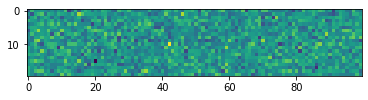

In [112]:
noise=tf.random.normal(shape=[20,reduced_dim])
plt.imshow(noise)

In [113]:
images_generated=generator(noise)

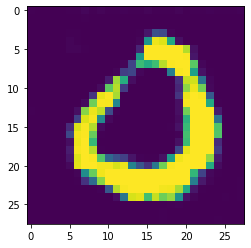

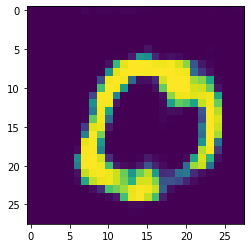

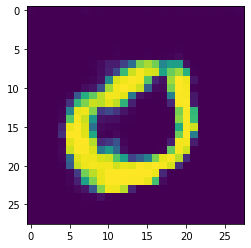

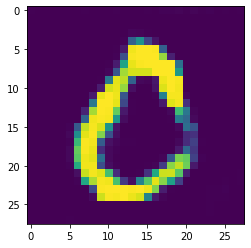

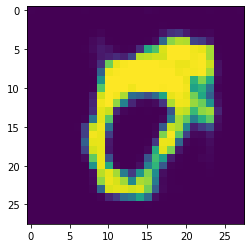

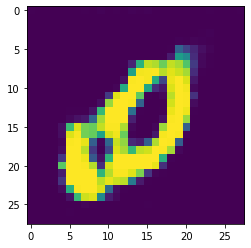

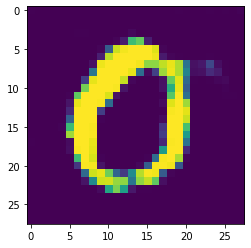

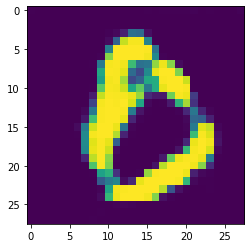

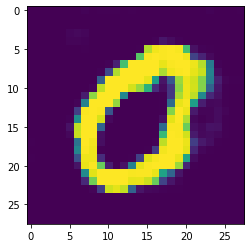

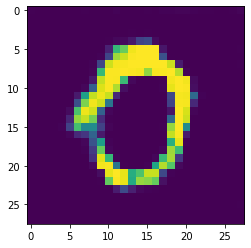

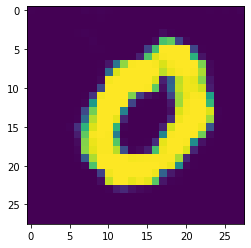

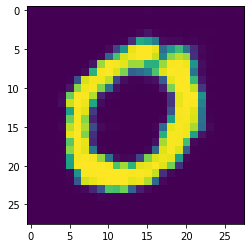

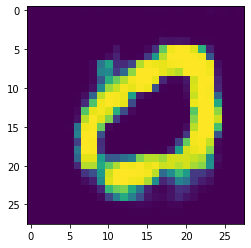

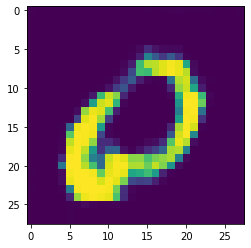

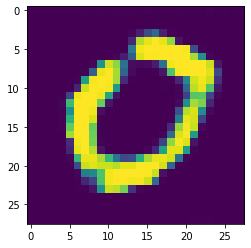

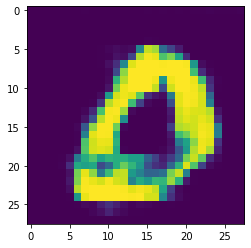

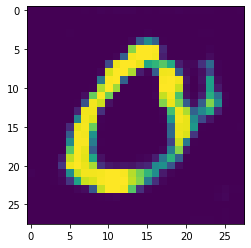

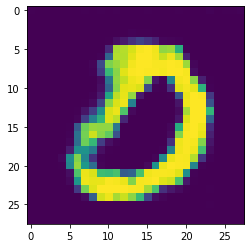

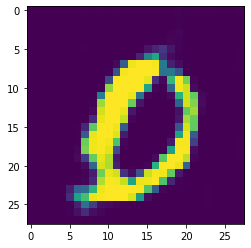

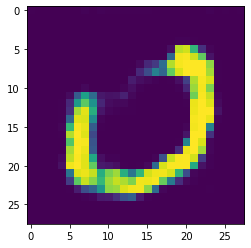

In [114]:
for image in images_generated:
    plt.imshow(image.numpy().reshape(28,28))
    plt.show()
    